### GRIP : The Spark Foundation - INTERNSHIP November-2021

##### Data Science and Business Analytics Intern

##### Author : Abhishek Chakraborty

##### TASK 3 : Create the Decision Tree Classifier and Visualize it graphically

In [87]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('default')
from sklearn import tree

In [88]:
# load iris dataset
iris= datasets.load_iris()
# creating a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['species']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'species']
# iris_df.dropna(how="all", inplace=True) # remove any empty lines

This is a binary Clasification problem where, the species are converted into numbers where

0 = SETOSA , 1 =  VERSICOLOR , 2 = VIRGINICA

In [17]:
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris_df['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
iris_df.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [94]:
# checking the statistic summary of the data
iris_df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [32]:
iris_df['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

This stratify parameter makes a split in such way so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's , This helps in stopping biasness in the sample.

In [65]:
#here we have used stratify parameter so the distribution of the sample equally gets split in
#the test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [36]:
#lets split the data
X=iris_df.drop('species',axis=1)
y=iris_df.species

In [66]:
# Defining the decision tree algorithm with depth 3
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=3)
# this is just a base model without hyperparameter tuning

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [69]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [70]:
prediction=dtree.predict(X_test)

In [71]:
prediction

array([0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1,
       2])

In [72]:
print('The accuracy of the Decision Tree is ',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is  0.9555555555555556


our model predict 95% of the data correctly.

##### Visualizing the tree

In [83]:
fn=['sepal_length','sepal_width','petal_length','petal_width']
cn=['setosa','versicolor','virginica']

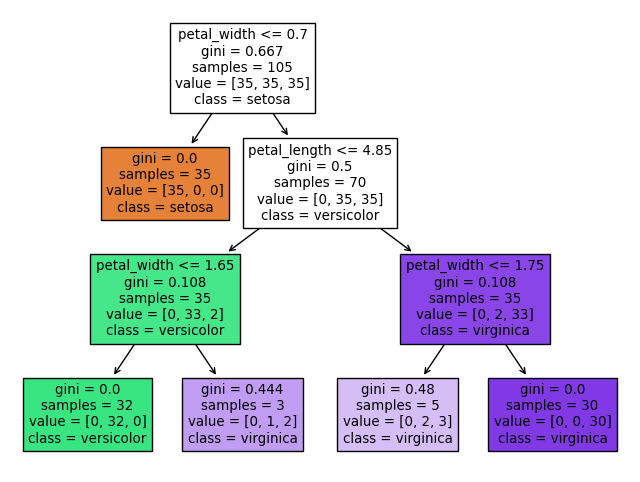

In [93]:
plt.figure(figsize=(8,6))
tree.plot_tree(dtree,feature_names=fn,class_names=cn,filled=True);